In [0]:
%matplotlib inline

In [3]:
pip install mxnet

     |████████████████████████████████| 68.7MB 43kB/s 
  Found existing installation: graphviz 0.10.1
    Uninstalling graphviz-0.10.1:
      Successfully uninstalled graphviz-0.10.1


In [4]:
pip install gluoncv

     |████████████████████████████████| 757kB 3.7MB/s 


3. Test with DeepLabV3 Pre-trained Models
======================================

This is a quick demo of using GluonCV DeepLabV3 model on ADE20K dataset.
Please follow the `installation guide <../../index.html#installation>`__
to install MXNet and GluonCV if not yet.


In [0]:
import mxnet as mx
from mxnet import image
from mxnet.gluon.data.vision import transforms
import gluoncv
# using cpu
ctx = mx.cpu(0)

Prepare the image
-----------------

download the example image



load the image



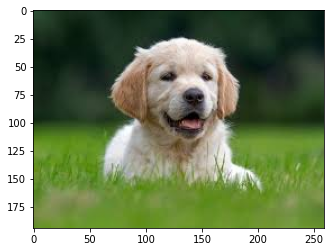

In [6]:
img = image.imread("/content/download (2).jpg")

from matplotlib import pyplot as plt
plt.imshow(img.asnumpy())
plt.show()

normalize the image using dataset mean



In [0]:
from gluoncv.data.transforms.presets.segmentation import test_transform
img = test_transform(img, ctx)

Load the pre-trained model and make prediction
----------------------------------------------

get pre-trained model



In [8]:
model = gluoncv.model_zoo.get_model('deeplab_resnet101_ade', pretrained=True)

100121KB [00:01, 60183.99KB/s]                           


100%|██████████| 221969/221969 [00:03<00:00, 58796.46KB/s]


 Make prediction using single scale and Add color for visualization



In [0]:
output = model.predict(img)
predict = mx.nd.squeeze(mx.nd.argmax(output, 1)).asnumpy()
from gluoncv.utils.viz import get_color_pallete
import matplotlib.image as mpimg
mask = get_color_pallete(predict, 'ade20k')
mask.save('output.png')

# Show the predicted mask



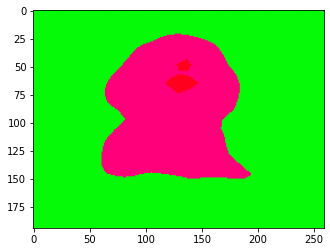

In [17]:
mmask = mpimg.imread('output.png')
plt.imshow(mmask)
plt.show()